## Telecom Churn Case Study
### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,recall_score,precision_score, f1_score

In [3]:
# To display all rows and columns in dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Reading And Understanding Data

In [4]:
df=pd.read_csv("/Users/vamsi/Desktop/Upgrad/Course 3/Telecom Churn Group Case Study/telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
#as can be seen from dataset there are lot of missin values let's get the figure
round(100*(df.isnull().sum()/len(df)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### Data preparation and Filtering High- Value Customers

In [8]:
### Creating new features from existing one

In [9]:
#let's define high value customers by considering the good phase of customer(first two months)
df['good_phase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [10]:
df['good_phase']

0          307.0
1          229.0
2          241.5
3          270.0
4          273.0
5           60.0
6          360.5
7         1185.0
8          519.0
9          207.5
10           0.0
11         183.0
12         110.0
13         380.0
14          50.0
15         343.0
16         459.0
17         408.0
18          45.0
19         224.0
20         343.5
21         640.0
22         142.5
23         227.0
24         385.0
25         311.0
26          77.0
27          30.0
28          96.5
29          98.0
30          86.0
31         305.5
32          47.0
33        1932.0
34         220.5
35         200.5
36         125.0
37          25.0
38         528.0
39         154.0
40         126.0
41         503.0
42         161.0
43         210.0
44         244.0
45         125.0
46         161.0
47         205.0
48        1448.5
49          66.0
50         154.0
51         282.5
52          99.0
53        1265.5
54         168.0
55          50.5
56         454.0
57        1147.0
58         175

In [11]:
#need to keep only high value customer hence let's set the good phase percentile to 70%
df = df[df['good_phase'] > df['good_phase'].quantile(0.70)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to good_phase
dtypes: float64(180), int64(35), object(12)
memory usage: 52.1+ MB


In [12]:
#combining incoming, outgoing, and data usage into one column
df['tot_usage'] = df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']


In [13]:
df.tot_usage[:5]

7        0.00
8      177.09
13    1077.95
16     590.30
17     718.21
Name: tot_usage, dtype: float64

In [14]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y])
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x and y

In [15]:
## taging churn customers on basing of usage
df['churn'] = np.where(df['tot_usage']== 0, 1, 0)
df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [16]:
df=df.drop(['good_phase','tot_usage'],1)

In [17]:
df.shape

(29979, 227)

In [18]:
#let's remove all the attributes corresponding to the churn phase
att_col=[col for col in df.columns if '_9' in col]
df = df.drop(att_col,1)




In [19]:
df=df.drop('sep_vbc_3g',1)

In [20]:
df.shape

(29979, 172)

In [21]:
### Let's check the churn rate so far
c=df.churn
c_rate=round(100*(sum(c)/len(df)),2)

In [22]:
c_rate ##churn rate of customer 

8.64

In [23]:
### Let's check the missing value in the new df
round(100*(df.isnull().sum()/len(df)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou

### Treating Missing Values

In [24]:

#deleting below coloums as all value are zero or constant
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [25]:
round(100*(df.isnull().sum()/len(df)),2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou_6             1.05
loc_og_t2f_mou_7             1.01
loc_og_t2f_mou_8             3.13
loc_og_t2c_mou_6             1.05
loc_og_t2c_mou_7             1.01
loc_og_t2c_mou_8             3.13
loc_og_mou_6                 1.05
loc_og_mou_7  

In [26]:
df.shape

(29979, 159)

In [27]:
### dropping columns which has _6,_7,_8 as they are not contributing towards data much
lis = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for field in lis:
    for month in ['6', '7', '8']:
        lis = field + '_' + month
        df = df.drop([lis], 1)

In [28]:
df.shape

(29979, 129)

In [29]:
round(100*(df.isnull().sum()/len(df)),2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8       3.13
std_og_t2m_mou_6       1.05
std_og_t2m_mou_7    

In [30]:
## there is a date columns but the value is in sting let's impute them with the mode value and change the type to datetime
lis = ['date_of_last_rech']

for field in lis:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        df[field_to_be_imputed_with_2].fillna(df[field_to_be_imputed_with_2].mode()[0], inplace=True)

In [31]:
df['date_of_last_rech_6'] = pd.to_datetime(df.date_of_last_rech_6).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df.date_of_last_rech_7).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df.date_of_last_rech_8).dt.day

In [32]:
### now we can see most of out data is cleaned apart from some. Let's impute them with the median value
missing_cols = df.columns[df.isnull().sum()>0]
for col in missing_cols:
    df[col].fillna((df[col].median()), inplace=True)

In [33]:
round(100*(df.isnull().sum()/len(df)),2)

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
s

In [34]:
## data is all cleaned, Now let's check for the outliers
df.shape

(29979, 129)

In [35]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    587.587624    589.424681    535.067748    297.590611   
std     6.846594e+05    442.848876    463.049067    492.447887    460.257092   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000028e+09     18.221200     25.600600      0.000000      0.000000   
10%     7.000269e+09    270.692200    274.458200    134.118600     12.230000   
25%     7.000641e+09    364.352500    365.235000    289.782000     43.590000   
50%     7.001232e+09    495.951000    493.781000    452.232000    128.480000   
75%     7.001814e+09    704.184500    700.986000    671.349500    353.500000   
90%     7.002167e+09    994.311800    996.051400    985.499200    795.354000   
95%     7.002287e+09   1240.976700   1261.848400   1258.703300   1154.900000   
99%     7.002387e+09   1983.590100   1999.509680   1988.082260   2166.876000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     305.886840    271.137938    421.142281    426.990330    383.029940   
std      481.318377    465.205131    468.998414    485.030117    473.464516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      1.057800      1.099000      0.000000   
10%       11.726000      6.906000     58.606000     59.604000     35.072000   
25%       43.370000     34.060000    142.860000    141.280000    111.780000   
50%      128.120000    106.390000    285.990000    285.630000    251.530000   
75%      360.360000    298.215000    523.625000    532.905000    483.000000   
90%      825.486000    724.182000    916.490000    935.716000    854.006000   
95%     1208.691000   1115.857000   1271.757000   1287.221000   1188.523000   
99%     2220.577600   2189.445800   2328.192600   2411.004400   2212.303000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       17.428073      13.535270      13.263074      29.348362   
std        79.192826      76.343222      74.588105     118.629898   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        32.740000      18.390000      18.664000      64.604000   
95%        94.663000      63.422000      62.813000     168.647000   
99%       349.546000     292.851400     288.536400     544.085400   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       22.056425      21.483542         95.084989         96.129949   
std        97.974803     106.294911        236.844869        248.141101   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          1.190000          1.460000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         33.340000         33.890000   
75%         0.000000       0.000000         91.550000         91.535000   
90%        41.216000      37.150000        208.006000        2

### Correlation

In [36]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

df = df.drop(to_drop, 1)

In [37]:
df.shape

(29979, 69)

In [38]:
df=df.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [39]:
df.shape

(29979, 63)

### EDA

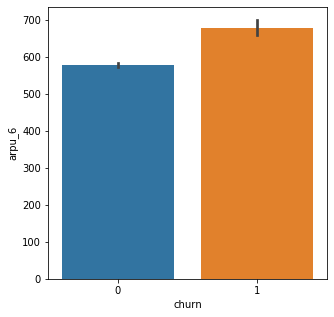

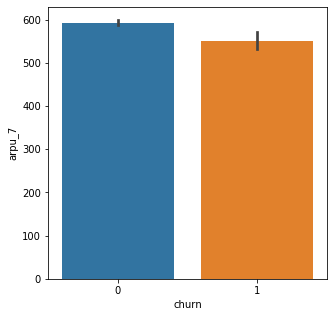

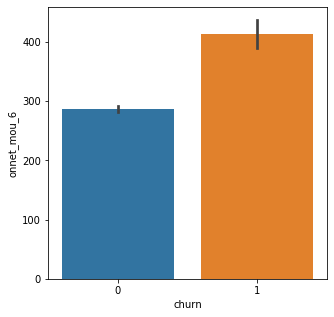

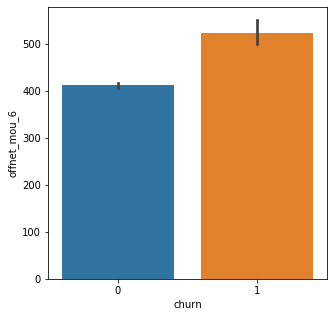

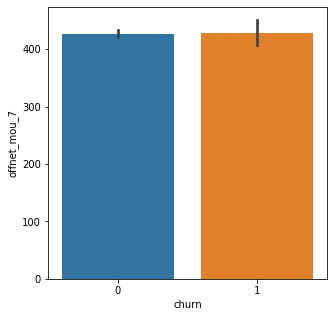

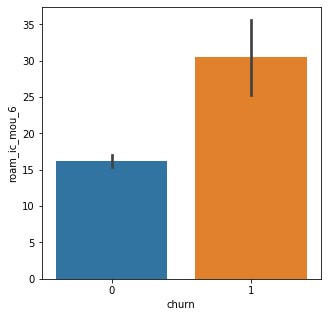

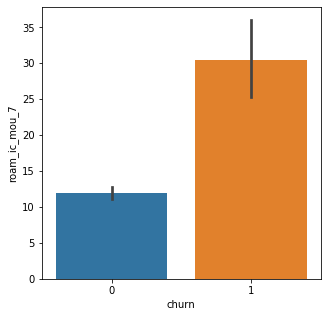

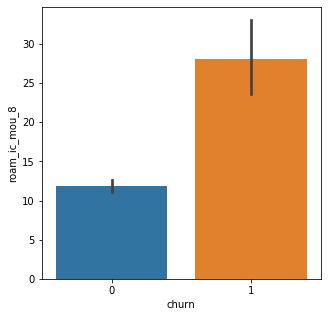

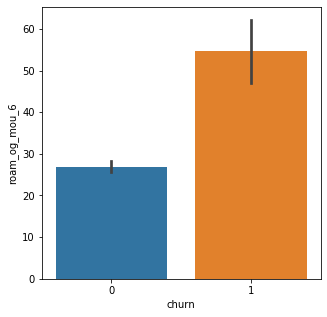

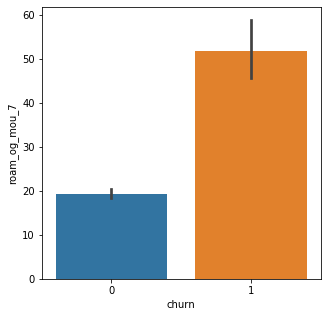

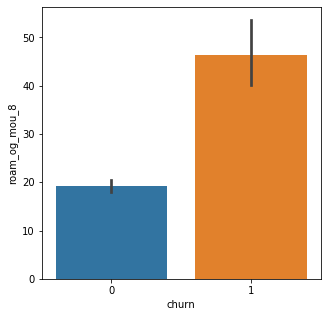

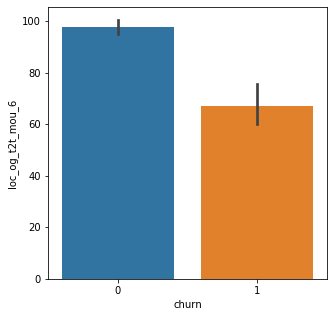

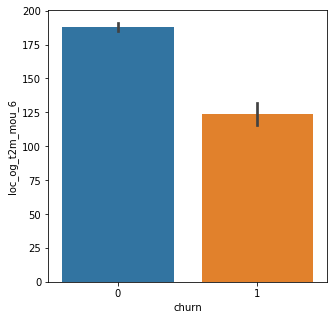

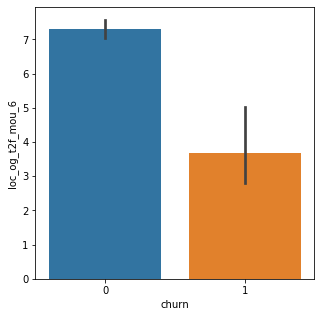

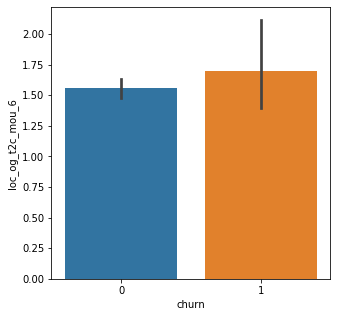

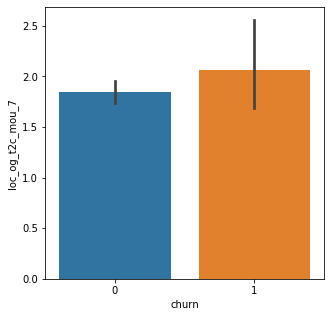

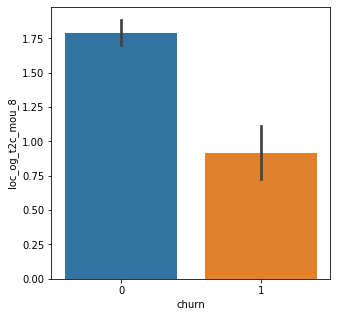

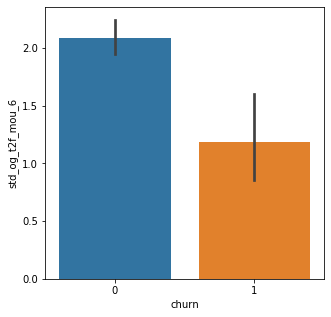

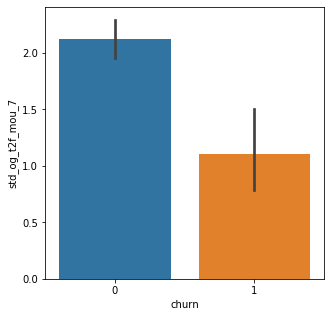

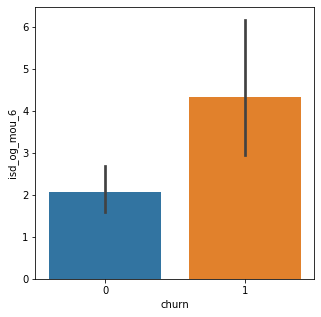

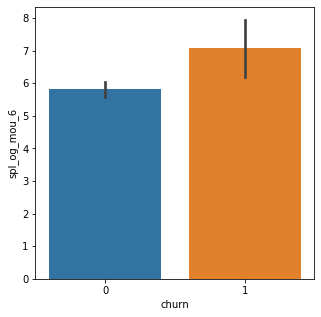

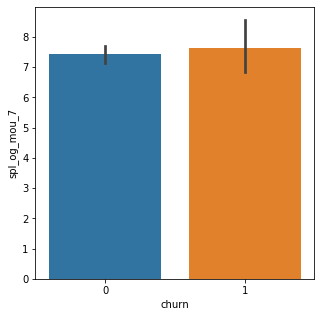

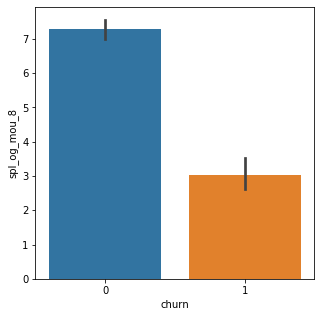

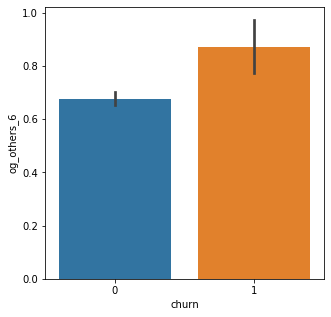

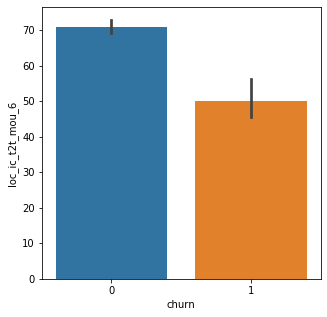

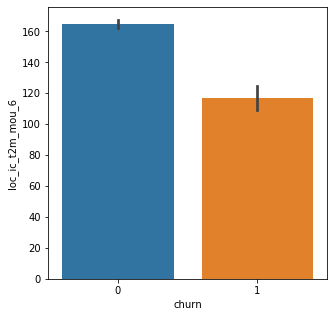

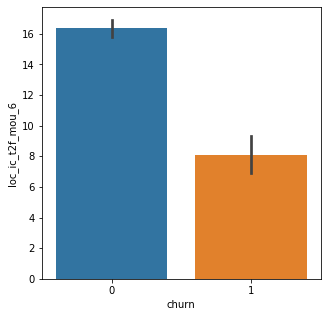

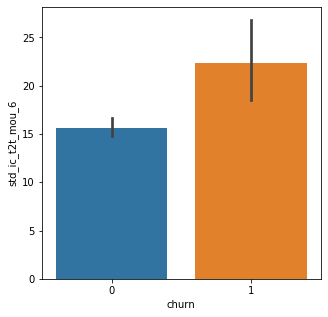

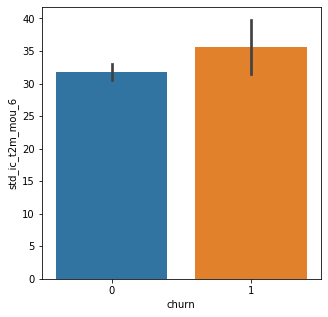

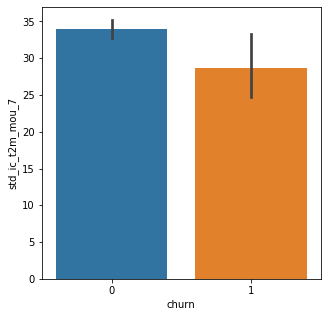

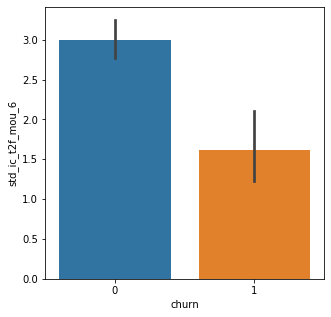

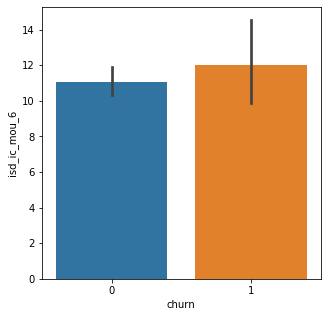

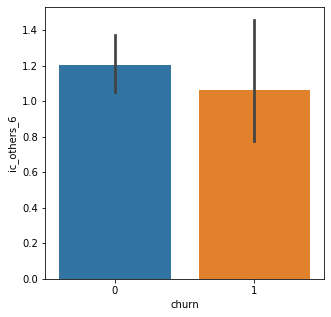

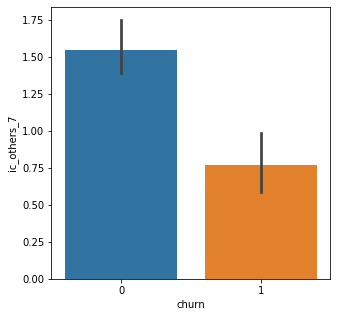

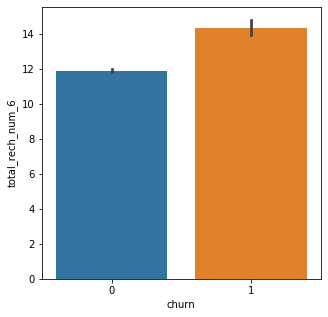

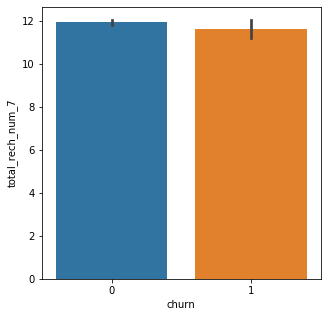

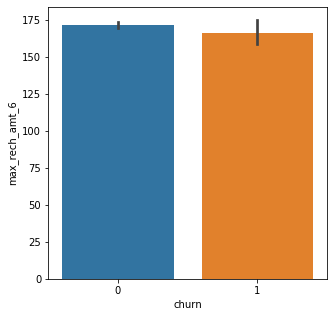

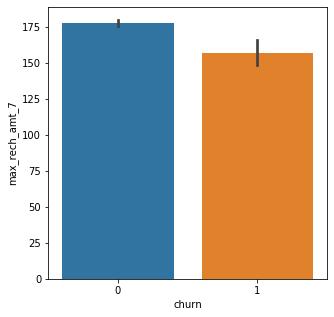

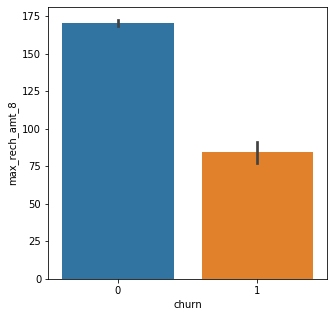

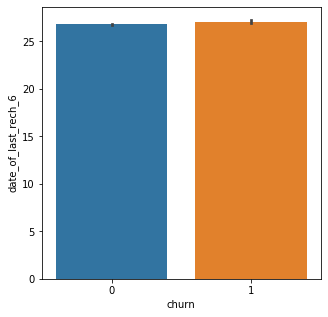

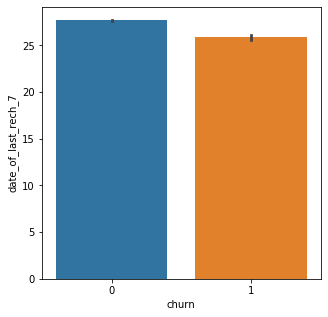

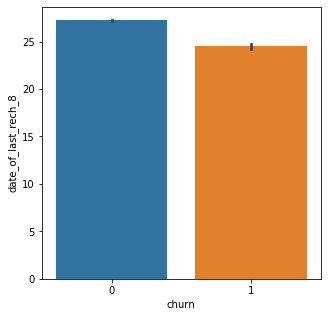

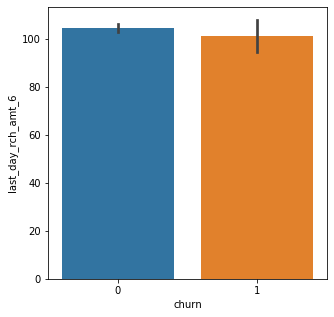

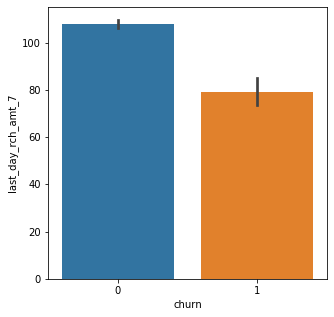

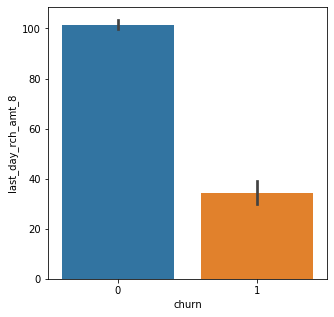

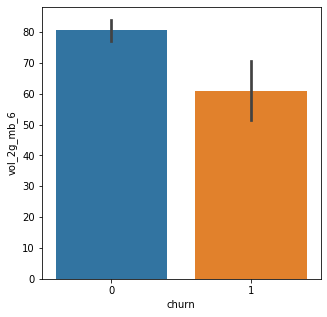

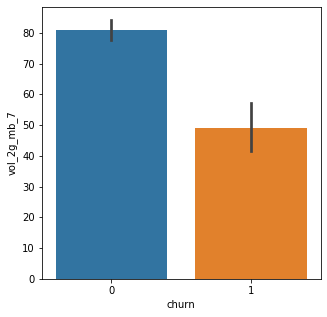

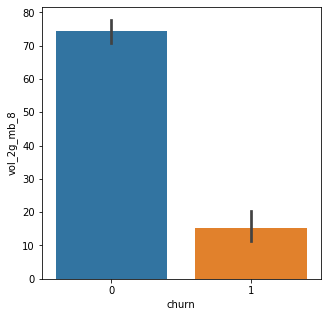

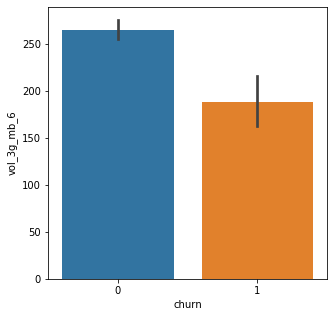

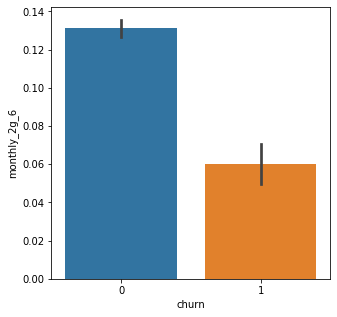

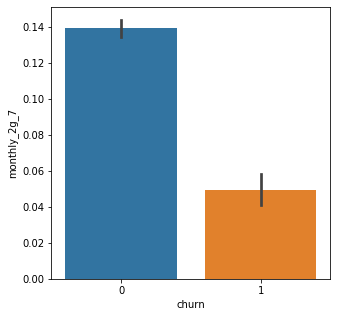

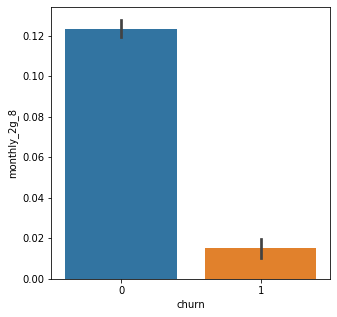

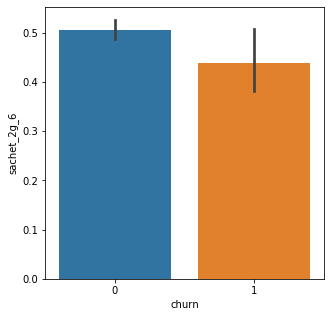

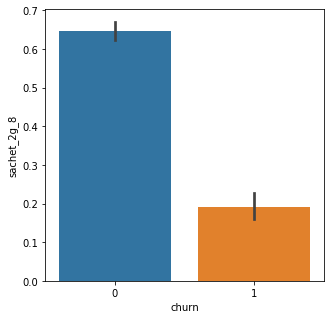

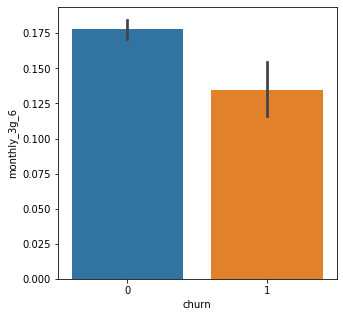

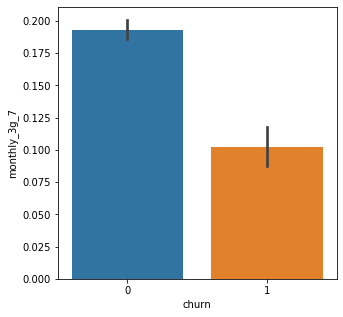

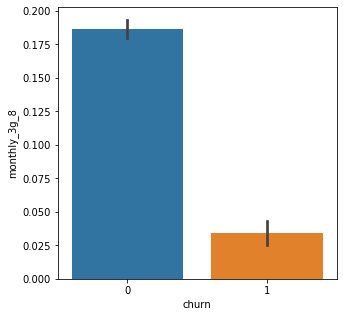

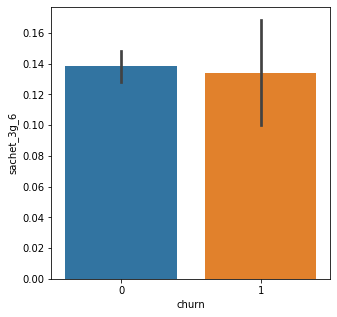

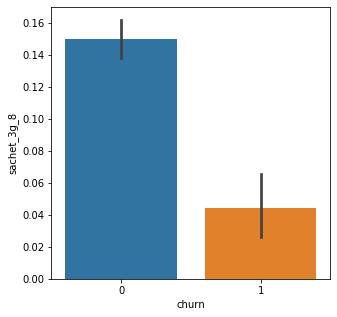

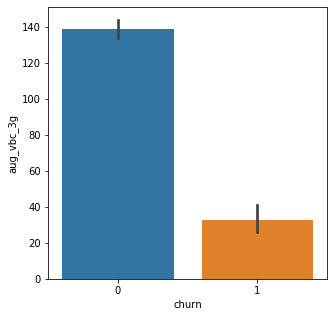

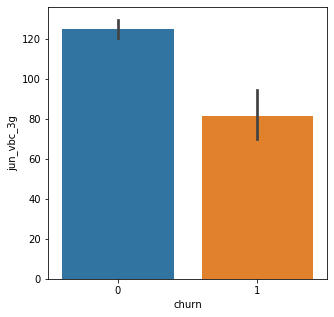

In [40]:
cols = [col for col in df.columns if col not in ['churn','mobile_number']]
for col in cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=df)
    plt.show()

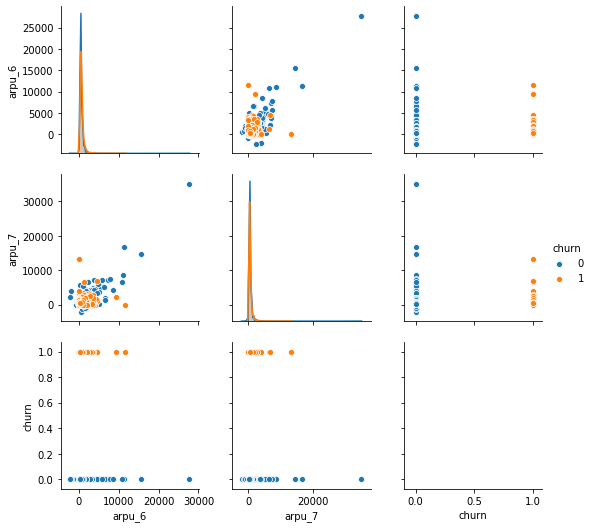

In [41]:
sns.pairplot(data=df[['arpu_6','arpu_7','churn']],hue='churn')
plt.show()

### Modelling

In [42]:
bkp_df=df.copy()   # Taking copy of our original dataset

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# defining target variable before splitting
x = df.drop(['churn','mobile_number'],axis=1)
y = df['churn']

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
x.head()

arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
7   1069.180  1349.850        57.84        453.43        567.16   
8    378.721   492.223       413.69         94.66         80.63   
13   492.846   205.671       501.76        413.31        119.28   
16   430.975   299.869        50.51        296.29        229.74   
17   690.008    18.980      1185.91         61.64          0.00   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
7           38.06             51.39            308.63             62.13   
8            0.00            297.13             80.96              0.00   
13           1.44             49.63            151.13              4.54   
16           0.00             42.61            273.29              0.00   
17          13.34             38.99             58.54              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  \
7                0.0               0.0              0.00              6.66   
8                0.0               0.0              7.15              0.00   
13               0.0               0.0              0.49              0.00   
16               0.0               0.0              0.00              0.00   
17               0.0               0.0              0.00              0.00   

    std_og_t2f_mou_7  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7              20.08           0.0          4.50          0.00          6.50   
8               0.00           0.0          0.00          0.00         10.23   
13              0.00           0.0          0.00          0.00          4.78   
16              0.00           0.0          0.00          3.26          5.91   
17              0.00           0.0          2.58          0.00          0.00   

    og_others_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
7          0.00             58.14            217.56            152.16   
8          0.00             23.84             57.58              0.00   
13         0.00             67.88            142.88              4.81   
16         0.00             41.33            226.81              8.71   
17         0.93             34.54             47.41              0.00   

    std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
7              36.89             91.44            126.99             52.19   
8               0.00             22.43              4.08              0.00   
13            115.68            308.13             29.79              0.00   
16             68.79             18.68             73.08              0.51   
17              8.63              1.28              0.00              0.00   

    isd_ic_mou_6  ic_others_6  ic_others_7  total_rech_num_6  \
7           2.06        15.74        15.19                 5   
8           0.00         0.00         0.00                19   
13        245.28        83.48        16.24                 6   
16          0.00         0.00         0.00                10   
17          0.00         0.00         0.00                19   

    total_rech_num_7  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
7                  5            1580             790            1580   
8                 21              90             154              30   
13                 4             110             110             130   
16                 6             110             110             130   
17                 2             110               0          

In [47]:
y.head()


7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [48]:
scaler=MinMaxScaler()

In [49]:
col=x.columns

In [50]:
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'monthly_2g_6',
   

In [51]:
x[col]=scaler.fit_transform(x[col])

In [52]:
x.head()

arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
7   0.110967  0.090525     0.007841      0.054223      0.058669   
8   0.087944  0.067446     0.056081      0.011320      0.008341   
13  0.091750  0.059734     0.068019      0.049425      0.012339   
16  0.089687  0.062269     0.006847      0.035431      0.023765   
17  0.098324  0.054710     0.160764      0.007371      0.000000   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7        0.006211       0.008782       0.007588       0.006289       0.004477   
8        0.000000       0.000000       0.000000       0.000000       0.000000   
13       0.009004       0.037826       0.017293       0.002114       0.012539   
16       0.000000       0.000742       0.000000       0.000000       0.006309   
17       0.000000       0.001248       0.001154       0.000000       0.003008   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
7        0.007131          0.007991          0.065253          0.042380   
8        0.000000          0.046200          0.017117          0.000000   
13       0.000270          0.007717          0.031953          0.003097   
16       0.000000          0.006625          0.057781          0.000000   
17       0.002500          0.006063          0.012377          0.000000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  \
7                0.0               0.0          0.000000          0.010596   
8                0.0               0.0          0.020322          0.000000   
13               0.0               0.0          0.001393          0.000000   
16               0.0               0.0          0.000000          0.000000   
17               0.0               0.0          0.000000          0.000000   

    std_og_t2f_mou_7  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7           0.036869           0.0      0.004398      0.000000      0.004673   
8           0.000000           0.0      0.000000      0.000000      0.007355   
13          0.000000           0.0      0.000000      0.000000      0.003437   
16          0.000000           0.0      0.000000      0.002575      0.004249   
17          0.000000           0.0      0.002521      0.000000      0.000000   

    og_others_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
7      0.000000          0.009154          0.046350          0.090657   
8      0.000000          0.003753          0.012267          0.000000   
13     0.000000          0.010687          0.030440          0.002866   
16     0.000000          0.006507          0.048321          0.005189   
17     0.009244          0.005438          0.010100          0.000000   

    std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
7           0.006757          0.019748          0.036593          0.038627   
8           0.000000          0.004844          0.001176          0.000000   
13          0.021189          0.066547          0.008584          0.000000   
16          0.012600          0.004034          0.021058          0.000377   
17          0.001581          0.000276          0.000000          0.000000   

    isd_ic_mou_6  ic_others_6  ic_others_7  total_rech_num_6  \
7       0.000519     0.011710     0.010154          0.016287   
8       0.000000     0.000000     0.000000          0.061889   
13      0.061851     0.062107     0.010856          0.019544   
16      0.000000     0.000000     0.000000          0.032573   
17      0.000000     0.000000     0.000000          0.061889   

    total_rech_num_7  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
7           0.036232        0.394015        0.197007        0.355136   
8           0.152174        0.022444        0.038404        0.006743   
13          0.028986        0.027431        0.027431        0.029220   
16          0.043478        0.027431        0.027431        0.029220   
17          0.014493        0.027431        0.000000        0.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
X_train.head()

arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
88105  0.075316  0.071798     0.017417      0.034200      0.136497   
34588  0.086774  0.068099     0.006302      0.011334      0.010073   
16623  0.105279  0.067608     0.011260      0.054122      0.049243   
54904  0.090119  0.072708     0.027829      0.030593      0.129747   
33555  0.091061  0.062547     0.000577      0.135415      0.073563   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
88105       0.000000            0.0            0.0        0.00000   
34588       0.000000            0.0            0.0        0.00000   
16623       0.000000            0.0            0.0        0.00000   
54904       0.000000            0.0            0.0        0.00000   
33555       0.000394            0.0            0.0        0.00049   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
88105            0.0            0.0          0.005184          0.021889   
34588            0.0            0.0          0.004935          0.019031   
16623            0.0            0.0          0.012825          0.084373   
54904            0.0            0.0          0.019212          0.046210   
33555            0.0            0.0          0.000662          0.001867   

       loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
88105          0.000259               0.0          0.009127          0.000711   
34588          0.003247               0.0          0.000000          0.000000   
16623          0.021616               0.0          0.000000          0.000000   
54904          0.001385               0.0          0.000228          0.000000   
33555          0.000000               0.0          0.000000          0.000000   

       std_og_t2f_mou_6  std_og_t2f_mou_7  isd_og_mou_6  spl_og_mou_6  \
88105               0.0               0.0           0.0      0.000254   
34588               0.0               0.0           0.0      0.000000   
16623               0.0               0.0           0.0      0.022977   
54904               0.0               0.0           0.0      0.001671   
33555               0.0               0.0           0.0      0.000000   

       spl_og_mou_7  spl_og_mou_8  og_others_6  loc_ic_t2t_mou_6  \
88105      0.004108      0.004213          0.0          0.004673   
34588      0.000000      0.000000          0.0          0.003072   
16623      0.014718      0.003329          0.0          0.004323   
54904      0.001588      0.004537          0.0          0.021233   
33555      0.000000      0.000000          0.0          0.000926   

       loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  \
88105          0.020348          0.001227          0.000207          0.001587   
34588          0.014730          0.008723          0.001216          0.000359   
16623          0.031409          0.030344          0.000000          0.000173   
54904          0.032555          0.000000          0.000115          0.001650   
33555          0.006287          0.000000          0.000843          0.004531   

       std_ic_t2m_mou_7  std_ic_t2f_mou_6  isd_ic_mou_6  ic_others_6  \
88105          0.004579          0.000000      0.000000     0.000000   
34588          0.000000          0.000000      0.000000     0.000000   
16623          0.000775          0.000281      0.017402     0.000000   
54904          0.005498          0.000000      0.000000     0.000000   
33555          0.001931          0.000000      0.000000     0.000707   

       ic_others_7  total_rech_num_6  total_rech_num_7  max_rech_amt_6  \
88105      0.00000          0.000000          0.224638        0.000000   
34588      0.00000          0.029316          0.094203        0.062843   
16623      0.00006          0.045603          0.028986        0.062344   
54904      0.00000          0.016287          0.086957        0.031920   
33555      0.00000          0.026059          0.028986        0.027431   

       max_rech_amt_7 

In [55]:
X_test.head()

arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
76438  0.105179  0.075755     0.159239      0.088858      0.082820   
72869  0.093870  0.067968     0.026262      0.040920      0.048333   
86053  0.085646  0.063571     0.004349      0.030778      0.020105   
29093  0.084375  0.065152     0.002295      0.030914      0.028107   
96385  0.096248  0.075281     0.074093      0.019930      0.012060   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
76438       0.000000       0.000000       0.000000       0.000000   
72869       0.017518       0.000000       0.000000       0.012752   
86053       0.000000       0.000000       0.000000       0.000000   
29093       0.000000       0.000000       0.000000       0.000000   
96385       0.027517       0.030003       0.101057       0.189459   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
76438       0.000000       0.000000          0.182647          0.148044   
72869       0.000000       0.000000          0.026354          0.066285   
86053       0.000000       0.000000          0.004868          0.054276   
29093       0.000000       0.000000          0.000491          0.049117   
96385       0.252998       0.280856          0.000000          0.000000   

       loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
76438          0.000000               0.0          0.000000          0.000000   
72869          0.003247               0.0          0.000000          0.000028   
86053          0.000000               0.0          0.000000          0.000000   
29093          0.003690               0.0          0.000000          0.000426   
96385          0.000000               0.0          0.004564          0.000000   

       std_og_t2f_mou_6  std_og_t2f_mou_7  isd_og_mou_6  spl_og_mou_6  \
76438               0.0               0.0           0.0      0.000792   
72869               0.0               0.0           0.0      0.000000   
86053               0.0               0.0           0.0      0.000000   
29093               0.0               0.0           0.0      0.000000   
96385               0.0               0.0           0.0      0.000000   

       spl_og_mou_7  spl_og_mou_8  og_others_6  loc_ic_t2t_mou_6  \
76438      0.006976      0.002538     0.024948          0.105796   
72869      0.000798      0.000654     0.000000          0.022422   
86053      0.000000      0.000000     0.000000          0.009078   
29093      0.000000      0.000108     0.000000          0.000000   
96385      0.000000      0.000000     0.000000          0.000000   

       loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  \
76438          0.065275          0.001603          0.000000          0.010719   
72869          0.056144          0.003271          0.000289          0.000363   
86053          0.075906          0.072771          0.000326          0.000000   
29093          0.002819          0.000000          0.000000          0.003354   
96385          0.000000          0.000000          0.000000          0.000000   

       std_ic_t2m_mou_7  std_ic_t2f_mou_6  isd_ic_mou_6  ic_others_6  \
76438          0.014995               0.0      0.000000     0.000000   
72869          0.001472               0.0      0.000000     0.000372   
86053          0.002740               0.0      0.000000     0.000000   
29093          0.000429               0.0      0.003639     0.000000   
96385          0.000000               0.0      0.000000     0.000000   

       ic_others_7  total_rech_num_6  total_rech_num_7  max_rech_amt_6  \
76438          0.0          0.042345          0.065217        0.027431   
72869          0.0          0.026059          0.065217        0.031920   
86053          0.0          0.019544          0.028986        0.027431   
29093          0.0          0.019544          0.079710        0.027431   
96385          0.0          0.029316          0.072464        0.027431   

       max_rech_amt_7 

In [56]:
X_train.shape

(20985, 61)

In [57]:
X_test.shape

(8994, 61)

In [58]:
y_train.shape

(20985,)

In [59]:
y_test.shape

(8994,)

### PCA(Dimensionality Reduction)

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA( random_state=42)

In [62]:
pca.fit(X_train)

PCA(random_state=42)

In [63]:
print(pca.components_)

[[-4.43313562e-03 -8.54002070e-03 -4.18853362e-02 ... -9.82867187e-03
   1.46537433e-02  2.13871570e-02]
 [-3.51580323e-03 -3.37856746e-03 -4.09903828e-02 ... -1.13359770e-04
   1.87373046e-02  1.57984394e-02]
 [ 1.29996216e-02 -7.48517163e-03  6.01150013e-02 ... -1.22296182e-03
  -2.32197629e-02 -1.77374639e-02]
 ...
 [-3.54546133e-02  4.13217229e-02  9.62609520e-04 ... -4.04165946e-03
  -4.10871638e-03  9.94084009e-04]
 [-2.00626946e-01 -5.16572115e-01  3.80586047e-02 ...  3.46117263e-03
   4.34489465e-04  4.78976588e-03]
 [ 6.90261688e-01 -6.53135202e-01 -2.30378115e-02 ...  9.31094365e-03
  -1.74143283e-03 -3.86229980e-05]]


In [64]:
col_n = list(X_train.columns)

In [65]:
df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9]})
df1.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.004433 -0.003516  0.013000  0.003715  0.100171 -0.011602  0.001479   
1 -0.008540 -0.003379 -0.007485 -0.000825  0.081308 -0.002335  0.029709   
2 -0.041885 -0.040990  0.060115 -0.042433 -0.054982 -0.071060 -0.457899   
3 -0.037110 -0.026638  0.050182 -0.029238  0.452377 -0.379628 -0.037783   
4 -0.048125 -0.027523 -0.004547 -0.035061  0.356909 -0.310541  0.039707   
5  0.003039  0.003692  0.004467 -0.003713  0.021800  0.021902 -0.003483   
6  0.002343  0.001773  0.001028 -0.002795  0.020706  0.015223 -0.005169   
7  0.000514  0.001968 -0.000991 -0.001458  0.022724  0.011858 -0.004607   
8 -0.001878  0.002214  0.008814 -0.007838  0.030166  0.009859 -0.022860   
9 -0.001075  0.001583  0.004347 -0.009635  0.048859  0.017038 -0.020860   

        PC8       PC9      PC10  
0  0.084294  0.010135  0.024436  
1  0.061312 -0.007516  0.057001  
2  0.763649 -0.014792 -0.053396  
3 -0.087614  0.021764  0.170332  
4 -0.074133  0.008790  0.318610  
5  0.026300 -0.008797  0.192974  
6  0.019601 -0.005110  0.098771  
7  0.021844 -0.005898  0.073645  
8  0.039645 -0.010637  0.242403  
9  0.054556 -0.011756  0.245524

In [66]:
pca.explained_variance_ratio_

array([2.50207824e-01, 1.34378247e-01, 1.12601250e-01, 9.72434464e-02,
       4.41883059e-02, 3.57132207e-02, 2.96879344e-02, 2.92633027e-02,
       2.31265693e-02, 2.23999985e-02, 1.91237155e-02, 1.71973519e-02,
       1.55093411e-02, 1.42688910e-02, 9.77037031e-03, 9.54256231e-03,
       8.99961546e-03, 7.62326091e-03, 7.14329530e-03, 7.02862059e-03,
       6.70030802e-03, 6.36209165e-03, 5.95227845e-03, 5.80184657e-03,
       5.58826577e-03, 5.19996912e-03, 5.06404055e-03, 4.76390950e-03,
       4.63946232e-03, 4.26841060e-03, 3.58632664e-03, 3.42457804e-03,
       3.30259764e-03, 3.14542779e-03, 2.99055486e-03, 2.56174907e-03,
       2.26296050e-03, 2.18044134e-03, 2.09550374e-03, 2.05493879e-03,
       1.96383786e-03, 1.90011606e-03, 1.85242780e-03, 1.79808373e-03,
       1.46917131e-03, 1.44107857e-03, 1.33914180e-03, 1.30241701e-03,
       1.25399096e-03, 1.22700391e-03, 1.16859224e-03, 1.12963705e-03,
       1.07806839e-03, 9.89077146e-04, 7.83433387e-04, 7.14532437e-04,
      

In [67]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.25020782, 0.38458607, 0.49718732, 0.59443077, 0.63861907,
       0.67433229, 0.70402023, 0.73328353, 0.7564101 , 0.7788101 ,
       0.79793381, 0.81513117, 0.83064051, 0.8449094 , 0.85467977,
       0.86422233, 0.87322195, 0.88084521, 0.8879885 , 0.89501712,
       0.90171743, 0.90807952, 0.9140318 , 0.91983365, 0.92542191,
       0.93062188, 0.93568592, 0.94044983, 0.9450893 , 0.94935771,
       0.95294403, 0.95636861, 0.95967121, 0.96281664, 0.96580719,
       0.96836894, 0.9706319 , 0.97281234, 0.97490785, 0.97696278,
       0.97892662, 0.98082674, 0.98267917, 0.98447725, 0.98594642,
       0.9873875 , 0.98872664, 0.99002906, 0.99128305, 0.99251005,
       0.99367865, 0.99480828, 0.99588635, 0.99687543, 0.99765886,
       0.99837339, 0.99889737, 0.99929722, 0.99957219, 0.99980727,
       1.        ])

<BarContainer object of 61 artists>

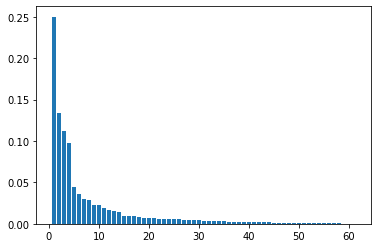

In [68]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

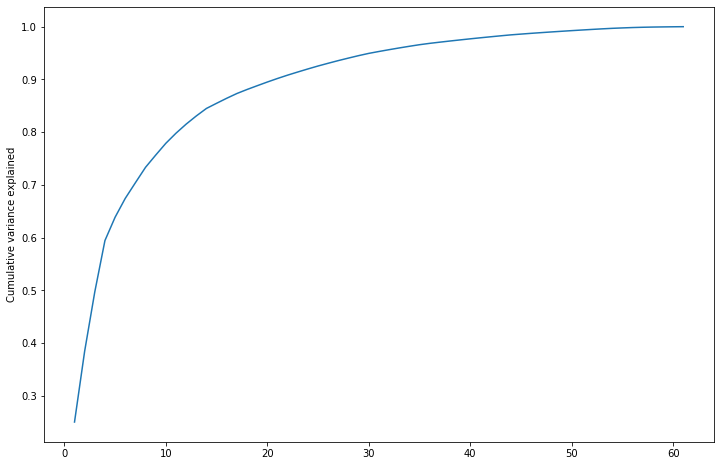

In [69]:
#scree PLOT
plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [70]:
## As we can see 40 components explains over 90% of accuracy hence 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 40)

### Logistic Regression with PCA

In [71]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 40)

In [72]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [73]:
learner_pca = LogisticRegression(class_weight='balanced')


In [74]:
model_pca = learner_pca.fit(df_train_pca,y_train)

In [75]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.83'

In [76]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [77]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6509 1670]
 [ 208  607]]
0.7911941294196131


In [78]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})
y_pred_final.head()

churn  churn_prob
0      0    0.165166
1      0    0.214968
2      0    0.301924
3      0    0.303192
4      0    0.929834

In [79]:
##Checking ROC score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8305137277345769


In [80]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

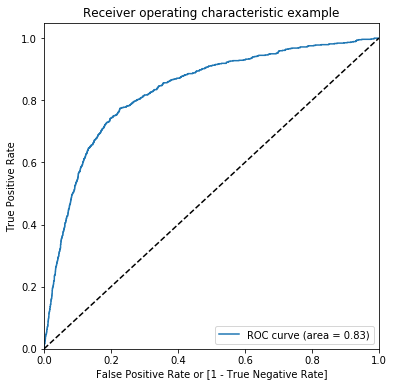

(array([0.00000000e+00, 1.22264335e-04, 2.44528671e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99540673e+00, 9.95406731e-01, 9.93884240e-01, ...,
        1.98469107e-05, 1.55818523e-06, 4.05608016e-07]))

In [81]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

### Creating cut offs

In [82]:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.165166    1    1    0    0    0    0    0    0    0    0
1      0    0.214968    1    1    1    0    0    0    0    0    0    0
2      0    0.301924    1    1    1    1    0    0    0    0    0    0
3      0    0.303192    1    1    1    1    0    0    0    0    0    0
4      0    0.929834    1    1    1    1    1    1    1    1    1    1

In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.183567  0.103680  0.985276
0.2   0.2  0.306204  0.240127  0.969325
0.3   0.3  0.468646  0.422912  0.927607
0.4   0.4  0.654436  0.634307  0.856442
0.5   0.5  0.791194  0.795819  0.744785
0.6   0.6  0.860129  0.887150  0.588957
0.7   0.7  0.887481  0.935444  0.406135
0.8   0.8  0.901156  0.966377  0.246626
0.9   0.9  0.906160  0.987040  0.094479


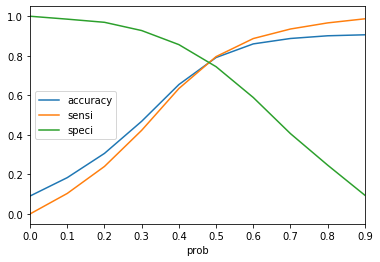

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [85]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6509, 1670],
       [ 208,  607]])

### Modelling with RFE

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE


In [88]:
rfe = RFE(logreg,10)   ## as after dimensionality reduction we came to 10 columns           
rfe = rfe.fit(x,y)
rfe.support_          


array([ True, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False])

In [89]:
rfe.ranking_

array([ 1, 35,  8,  2, 44, 42, 14,  1, 49,  1,  5,  7,  1, 16, 46, 26, 12,
       43, 33, 28, 45, 37,  1, 51, 15, 19,  4, 24, 30, 29, 27, 38, 52, 39,
       13, 36, 20, 34,  1, 50, 11,  6, 47,  9,  1, 22, 32, 10, 31, 41, 21,
        1, 17,  1, 25, 48,  1, 23, 18,  3, 40])

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'roam_ic_mou_8', 'roam_og_mou_7', 'loc_og_t2m_mou_6',
       'spl_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

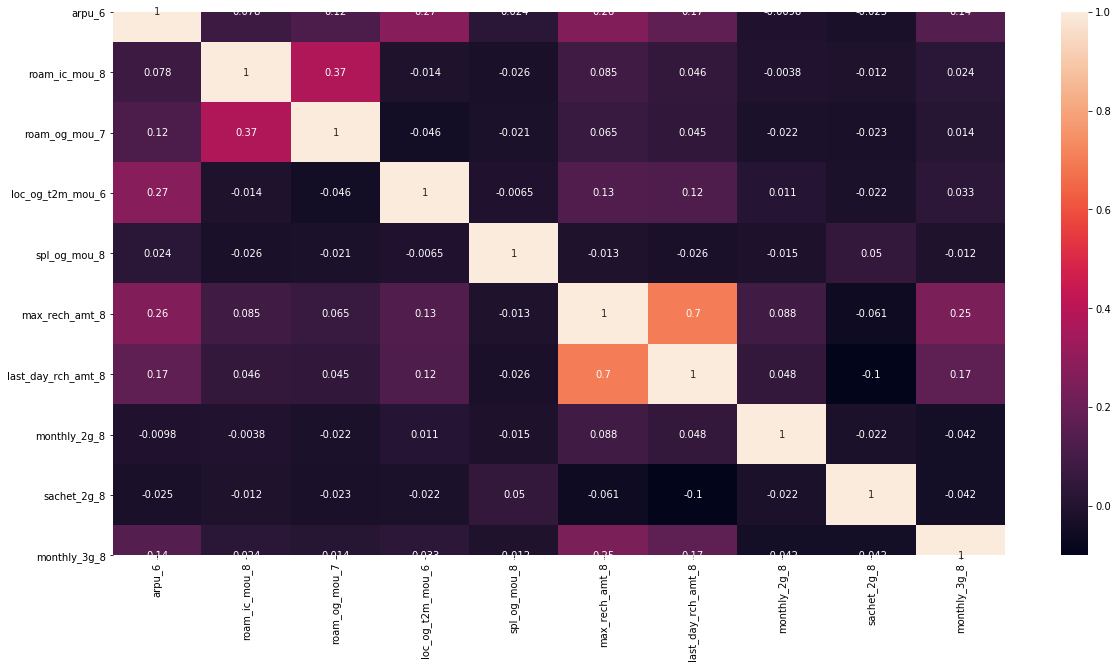

In [91]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(x[col].corr(),annot = True)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x[col].columns
vif['VIF'] = [variance_inflation_factor(x[col].values, i) for i in range(x[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5      max_rech_amt_8  3.98
0              arpu_6  2.91
6  last_day_rch_amt_8  2.83
3    loc_og_t2m_mou_6  1.64
2       roam_og_mou_7  1.23
1       roam_ic_mou_8  1.21
9        monthly_3g_8  1.17
8         sachet_2g_8  1.12
7        monthly_2g_8  1.11
4        spl_og_mou_8  1.10

#### VIF's look preety good hence will move forward with these selected columns"

In [94]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [95]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.82'

In [96]:

#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [97]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      8179
           1       0.19      0.84      0.31       815

    accuracy                           0.67      8994
   macro avg       0.58      0.74      0.55      8994
weighted avg       0.90      0.67      0.74      8994

[[5316 2863]
 [ 134  681]]
accuracy_score :  0.6667778519012675


In [98]:

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [99]:
y_pred_final.head()

churn  churn_prob
0      0    0.371384
1      0    0.415411
2      0    0.409517
3      0    0.313539
4      0    0.905961

In [100]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8243159010393969


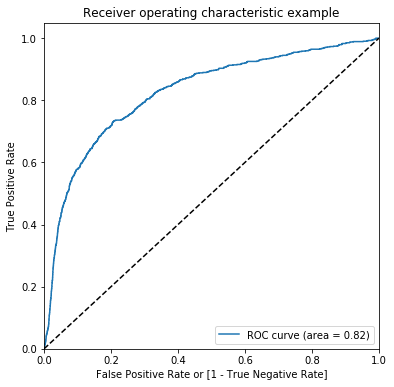

(array([0.00000000e+00, 1.22264335e-04, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.98645327e+00, 9.86453268e-01, 9.84667318e-01, ...,
        2.31795079e-06, 7.56842965e-07, 2.15869100e-07]))

In [101]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()


churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.371384    1    1    1    1    0    0    0    0    0    0
1      0    0.415411    1    1    1    1    1    0    0    0    0    0
2      0    0.409517    1    1    1    1    1    0    0    0    0    0
3      0    0.313539    1    1    1    1    0    0    0    0    0    0
4      0    0.905961    1    1    1    1    1    1    1    1    1    1

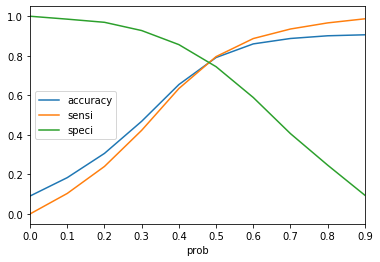

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [104]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [105]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[5316, 2863],
       [ 134,  681]])

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Precision
print('Precision: ', TP / float(TP+FP))

# Recall
print('Recall: ',TP / float(TP+FN))

Accuracy Score :  0.6667778519012675
Sensitivity:  0.8355828220858895
Specificity:  0.6499572074825773
false postive rate:  0.35004279251742265
positive predictive value:  0.19215575620767494
Negative predictive value:  0.9754128440366973
Precision:  0.19215575620767494
Recall:  0.8355828220858895


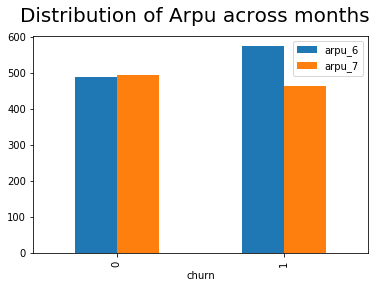

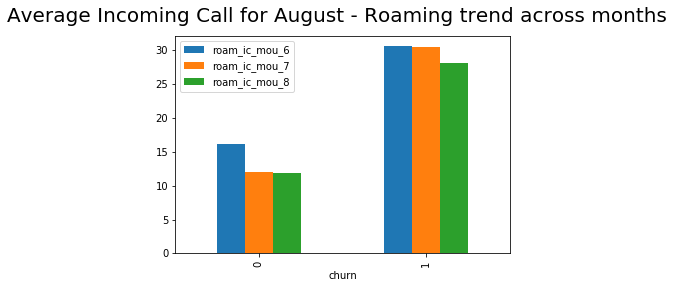

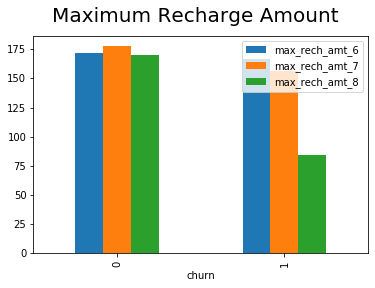

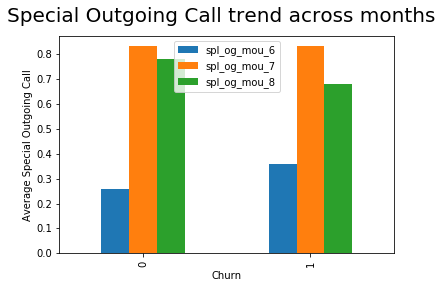

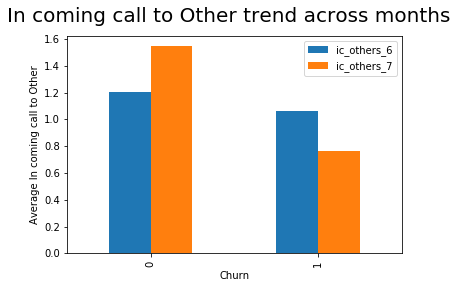

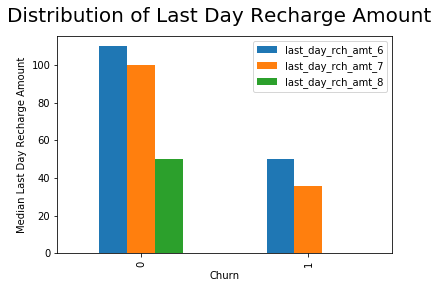

In [107]:
df['churn'] = df['churn'].astype('object', copy = False)
df_sample = df.groupby(['churn'])['arpu_6', 'arpu_7'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = df.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = df.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = df.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()




df_sample = df.groupby(['churn'])['ic_others_6', 'ic_others_7'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

df['churn'] = df['churn'].astype('object', copy = False)
df_sample = df.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

#### Resampling for handling Data Imbalance
#### Oversampling

In [108]:
from sklearn.utils import resample  # Calling resample library

In [109]:
# Oversampling

X = bkp_df.drop(['churn','mobile_number'],axis=1)
y = bkp_df['churn']

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.60,test_size=0.40,random_state=40)
X=pd.concat([X_train,y_train],axis=1)

In [111]:
# To Differentiate the dataset with churn and not churn labels
not_churn=X[X.churn==0]   
churn=X[X.churn==1]

churn_upsampled=resample(churn,replace=True, n_samples=len(not_churn),random_state=40)
upsampled=pd.concat([not_churn,churn_upsampled]) # Adding them in one dataset

upsampled.churn.value_counts()

1    16462
0    16462
Name: churn, dtype: int64

In [112]:
# To model the dataset using logistic regression post sampling

y_train=upsampled['churn']         # Creating y train set
X_train=upsampled.drop('churn',1)  # Creating X train set

pca_final=IncrementalPCA(n_components=40)    # PCA with 40 components

# Doing the transformation

pca_df_train=pca_final.fit_transform(X_train)
pca_df_test= pca_final.transform(X_test)

# Creating model using logistic regression

log_pca = LogisticRegression()
model_samp=log_pca.fit(pca_df_train,y_train)


In [113]:
y_pred=model_samp.predict(pca_df_test)   # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred)))

Accuracy Score is:  0.7014676450967312
Recall Score is:  0.7913533834586466
Precision Score is :  0.20047619047619047
F1 Score is:  0.3199088145896657


#### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [115]:
y_pred_rfc=rfc.predict(X_test)

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred_rfc)))

Accuracy Score is:  0.9352068045363575
Recall Score is:  0.46710526315789475
Precision Score is :  0.7029702970297029
F1 Score is:  0.5612648221343873


#### SMOTE Technique Model

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
X = bkp_df.drop(['churn','mobile_number'],axis=1)
y = bkp_df['churn']
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X, y, test_size=0.30,random_state=40) 

# SMOTE
smote_df=SMOTE(random_state=40)
X_train_sm,y_train_sm=smote_df.fit_sample(X_train_sm,y_train_sm)

In [118]:
pca_final=IncrementalPCA(n_components=40)

pca_df_train=pca_final.fit_transform(X_train_sm)
pca_df_test= pca_final.transform(X_test_sm)

log_pca = LogisticRegression()
model3=log_pca.fit(pca_df_train,y_train_sm)

In [119]:
y_pred=model3.predict(pca_df_test)

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred)))

Accuracy Score is:  0.6837891927951968
Recall Score is:  0.8221092757306226
Precision Score is :  0.1930766935243211
F1 Score is:  0.3127114548090866


In [120]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=100)

In [121]:
y_pred_rfc=rfc.predict(X_test_sm)    # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred_rfc)))

Accuracy Score is:  0.9236157438292195
Recall Score is:  0.6188055908513341
Precision Score is :  0.5572082379862701
F1 Score is:  0.5863937387116195


### k-fold grid search cross validation 

In [122]:
# Importing necessary libraries for grid search cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [123]:
kfold_smote_rfc=RandomForestClassifier(random_state=50)  # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)   # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],
           'max_depth': range(10,200,50)}

# Creating a model using Gridsearch CV

model_kfold_cv = GridSearchCV(estimator=kfold_smote_rfc,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='recall')

In [124]:
model_kfold_cv.fit(X_train_sm,y_train_sm) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [125]:
model_kfold_cv.best_params_ 

{'criterion': 'gini', 'max_depth': 60}

In [126]:
# Random forest classifier

kfold_smote_rfc = RandomForestClassifier(criterion=model_kfold_cv.best_params_['criterion'],max_depth=model_kfold_cv.best_params_['max_depth'],random_state=50)
kfold_smote_rfc.fit(X_train_sm,y_train_sm)                 # Fitting in train set
y_pred_kfold_smote_rfc=kfold_smote_rfc.predict(X_test_sm)      

In [127]:
# Model Evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred_kfold_smote_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred_kfold_smote_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred_kfold_smote_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred_kfold_smote_rfc)))

Accuracy Score is:  0.922503891483211
Recall Score is:  0.6111817026683609
Precision Score is :  0.551605504587156
F1 Score is:  0.5798673899939722


### Final Model :


Using SMOTE sampling and Random Forrest classifier we got below values which is the best model :
<br>
<br>
Accuracy Score is:  0.9236157438292195
<br>
Recall Score is:  0.6188055908513341
<br>
Precision Score is :  0.5572082379862701
<br>
F1 Score is:  0.5863937387116195
<br>

### To select key features of the model :

In [130]:
feature_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": kfold_smote_rfc.feature_importances_
})
feature_df.sort_values(by="Importance", ascending=False).head(15)

Feature  Importance
38       max_rech_amt_8    0.117564
44   last_day_rch_amt_8    0.108941
41  date_of_last_rech_8    0.084377
10        roam_og_mou_8    0.079079
7         roam_ic_mou_8    0.069824
22         spl_og_mou_8    0.028874
9         roam_og_mou_7    0.028463
6         roam_ic_mou_7    0.023431
37       max_rech_amt_7    0.022600
43   last_day_rch_amt_7    0.019724
40  date_of_last_rech_7    0.019430
20         spl_og_mou_6    0.018323
1                arpu_7    0.016659
27     std_ic_t2t_mou_6    0.015186
0                arpu_6    0.014425

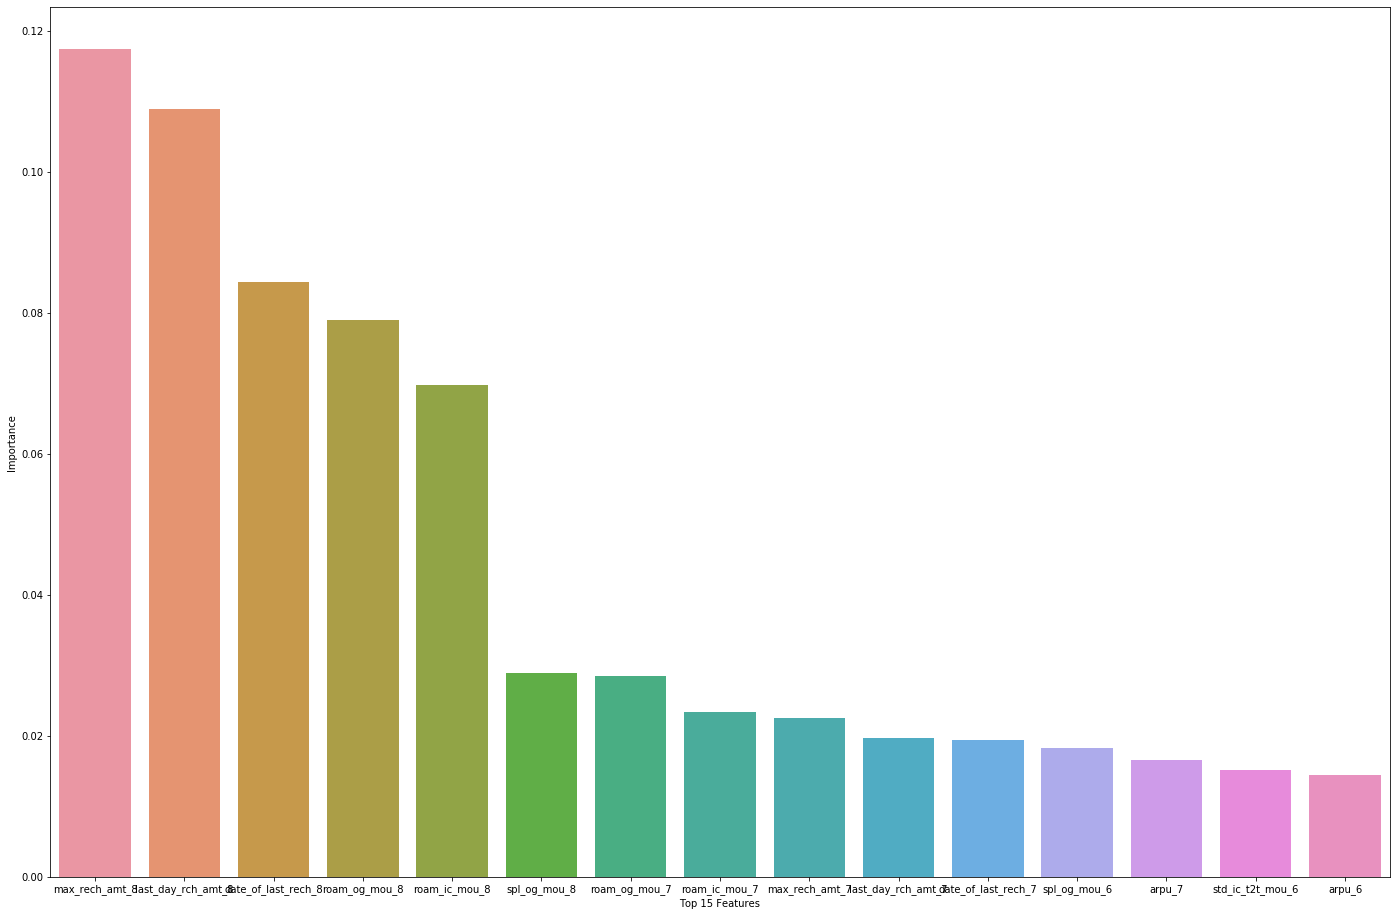

In [131]:
feature_df_1 = feature_df.sort_values(by="Importance",axis=0,ascending=False)
feature_df_1 = feature_df_1.reset_index(drop=True)

plt.figure(figsize=(24, 16))
bar = sns.barplot(x='Feature', y= 'Importance', data=feature_df_1[0:15])
bar.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.show()

#### Recommended Strategies to manage customer churn :

    Based on the model, below are the key factors which helps in identifying the customers who will churn :
    
        max_rech_amt_8
        last_day_rch_amt_8
        date_of_last_rech_8
        roam_og_mou_8
        roam_ic_mou_8
        spl_og_mou_8
        roam_og_mou_7
        roam_ic_mou_7
        max_rech_amt_7
        last_day_rch_amt_7
        date_of_last_rech_7
        spl_og_mou_6
        arpu_7
        std_ic_t2t_mou_6
        arpu_6
    
   - max_rech_amt_8, max_rech_amt_7 : We need to focus on customers whose average max recharge amount is decreased.
   
   - last_day_rch_amt_8, last_day_rch_amt_7 : If the last day recharge amount is lower then there is high chance of customer churning out. We need to focus on those customers whose last day recharge amount has decrased and following up with them with personalized offers will help in retaining them.
   
   - date_of_last_rech_8, date_of_last_rech_7 : Most of the users churns during last days of their recharge, so rolling out offers to them during those days helps in retaining them.
   
   - roam_og_mou_8, roam_og_mou_7, roam_ic_mou_7, roam_ic_mou_8 : Focus on customers whose roaming outgoing and incoming usage is increased drastically as there is likely to churn
   
   - arpu_6, arpu_7: Decrease in average revenue per user helps in identify the likely churn users. So rolling out some personalized offers to them helps in retaining them
   
   
   
 